<a href="https://colab.research.google.com/github/Arbi7k/Data-Science-Fundamentals/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern

# Coding Task 1

- Deadline: Send your solution notebook per email to Sigve by 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the
datafile and saves that information into a separate textfile. [0.5 points]
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points]
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

Mounted at /content/drive
   Unnamed: 0.1                  Unnamed: 0     Unnamed: 1  316.6137  \
0             0  2018-10-25 10:32:04.789000  1540456324789  0.329672   
1             1  2018-10-25 10:32:04.878000  1540456324878 -0.044412   
2             2  2018-10-25 10:32:04.962000  1540456324962  0.338219   
3             3  2018-10-25 10:32:05.046000  1540456325046 -0.049682   
4             4  2018-10-25 10:32:05.129000  1540456325129  0.335086   

   316.7492  316.8847  317.0203  317.1558  317.2913  317.4268  ...  778.9703  \
0  0.329672  0.329672  0.090294 -0.716926 -1.829304 -0.686330  ... -0.038483   
1 -0.044412 -0.044412  0.157632 -0.672423 -2.183981 -0.492421  ... -0.039428   
2  0.338219  0.338219  0.330993 -0.879836 -0.000000 -0.559845  ... -0.037725   
3 -0.049682 -0.049682  0.519086 -0.681150 -0.000000 -0.417230  ... -0.037613   
4  0.335086  0.335086 -0.041393 -0.000000 -1.802774 -0.510417  ... -0.040919   

    779.089  779.2076  779.3263  779.4449  779.5636  779.682

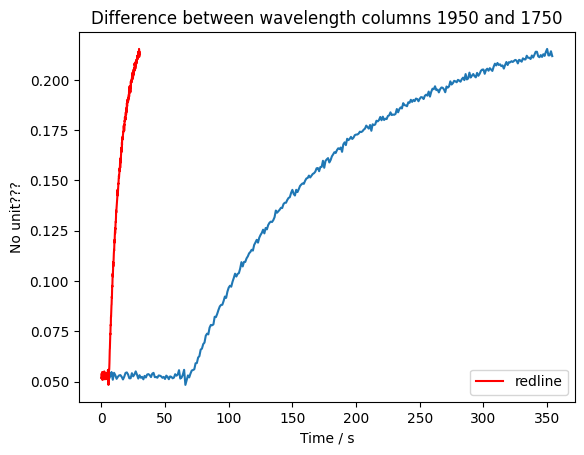

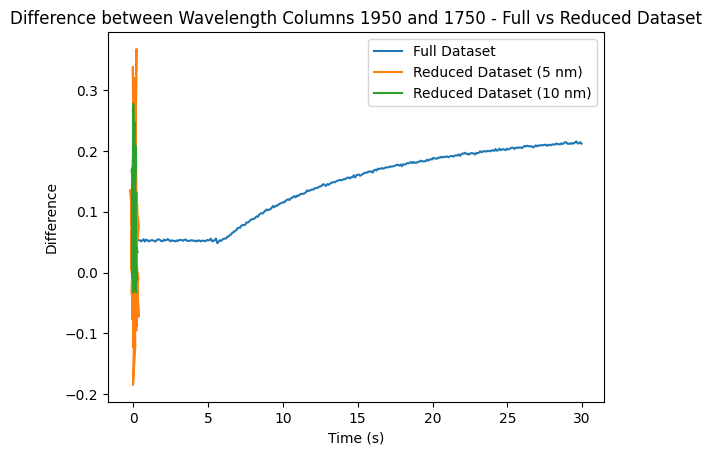

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set path to the CSV file
path = '/content/drive/My Drive/CCD-Data.csv'

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## CT-1.1
# Read the CSV file into a DataFrame
df = pd.read_csv(path, delimiter=',')

# Display the first few rows of the DataFrame
print(df.head())

# Write the DataFrame to a new CSV file
df.to_csv('CCD-Data-Clean.csv')



## CT-1.2
# mport necessary libraries
import math

# Define a function to reduce data resolutin by merging columns
def reduce_resolution(df):
  # Get relevant columns from the dataframe
  new_df = df.iloc[:,3:-1]

  # Round each column value to the neares integer
  new_columns = {col: math.floor(float(col)) for col in new_df.columns}
  new_df = new_df.rename(columns=new_columns)

  # Group columns by their rounded nm values and calculate the mean for each group
  red_df = new_df.groupby(new_df.columns, axis=1).mean()

  return red_df

#Apply the function to the dataframe
red_df = reduce_resolution(df)

# Display the first few rows of the reduced dataframe
red_df.head()

## CT-1.3

# Import necessary libraries
import math

# Define a function to merge columns based on wavelength wit hany number of nm per column
def merge_df(df,nm_s, nm_n):
  # Extract relevent columns from the dataframe
  new_df = df.iloc[:,3:-1]

  #Merge columns into one nm columns
  new_columns = {col: math.floor(float(col)) for col in new_df.columns}
  new_df = new_df.rename(columns=new_columns)
  new_df = new_df.groupby(new_df.columns, axis=1).mean()

  #Merge nm:n columns into one column
  new_columns = {col: (float(col)-nm_s)//nm_n for col in new_df.columns}
  new_df = new_df.rename(columns=new_columns)
  new_df = new_df.groupby(new_df.columns,axis=1).mean()

  #Fix the column labels
  new_columns = {col: int((float(col)*nm_n+nm_s)) for col in new_df.columns}
  new_df = new_df.rename(columns=new_columns)
  return new_df

# Apply the function to the dataframe
df_red = merge_df(df, 316,5)

#Display the first few rows of the merged dataframe
df_red.head()


## CT-1.4

# Import necessary libraries
import time

# Method 1: Writing line by line using a loop
red_df.to_csv('CCD-Data-Clean.csv')

# Opening the CSV file for reading and the TXT file for writing
f_in = open('CCD-Data-Clean.csv','r')
f_out = open('CCD-Data-CT14.txt','w')

# Reading lines from the CSV file and writing them to the TXT file
lines = f_in.readlines()
for line in lines:
    f_out.writelines(line)

# Close the files
f_in.close()
f_out.close()

# Calculate the elapsed time for the loop method
start_time = time.time()  # Start timing
elapsed_time_loop = time.time() - start_time

# Method 2: Using pandas method
start_time = time.time()  # Start timing

# Saving the dataframe to a CSV file using pandas method
red_df.to_csv('CCD-Data-Clean-Pandas.csv')

# Calculate the elapsed time for the pandas method
elapsed_time_pandas = time.time() - start_time

print("Elapsed time using explicit loop method:", elapsed_time_loop, "seconds")
print("Elapsed time using pandas method:", elapsed_time_pandas, "seconds")



## CT-1.5

# Import necessary libraries
import matplotlib.pyplot as plt


def plotWL(a,b):
    #Takes column numbers, not labels as input and assuming that the first column represents time
    x = df.iloc[:,0]

    #Calculating the difference between the data at wavelengths a and b
    y = - (df.iloc[:,b]-df.iloc[:,a])
    plt.plot(x,y)
    return


plotWL(1750, 1950)


## CT-1.6

# Import necessary libraries
import matplotlib.pyplot as plt

b = 1950
a = 1750

# Subtract with the ms value in the first row (0) and normalise to seconds
x = (df.iloc[:,2]-df.iloc[0,2])/1000
y = -(df.iloc[:,b]-df.iloc[:,a])

plt.plot(x,y,c='r', label='redline')
plt.xlabel('Time / s')
plt.ylabel('No unit???')
plt.title('Difference between wavelength columns '+str(b)+' and '+str(a))
plt.legend()

# Save the plot to a file
plt.savefig('myplot.png')
plt.show()


## CT-1.7

# Create reduced datasets
a_df = merge_df(df, 316, 5)
b_df = merge_df(df, 316, 10)

# Plotting the full dataset
plt.plot(x, y, label='Full Dataset')

# Plotting the reduced datasets
plt.plot(a_df.iloc[:,0], a_df.iloc[:,1], label='Reduced Dataset (5 nm)')
plt.plot(b_df.iloc[:,0], b_df.iloc[:,1], label='Reduced Dataset (10 nm)')

plt.xlabel('Time (s)')
plt.ylabel('Difference')
plt.title('Difference between Wavelength Columns {} and {} - Full vs Reduced Dataset'.format(b, a))
plt.legend()
plt.savefig('full_vs_reduced_plot.png')  # Save the plot to a file
plt.show()



